In [57]:
import dagshub
import mlflow
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from matplotlib import pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

# Define the sequential model.
model = tf.keras.models.Sequential()

# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
mlflow.tensorflow.autolog()

dagshub.init('autolog',
             'arindam.d.dey',
              mlflow=True)

Initialized MLflow to track repo "arindam.d.dey/autolog"

Repository arindam.d.dey/autolog initialized!

In [60]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

2024/06/24 21:36:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd67db828d02341279eea9d90d199f3ea', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.3195 - accuracy: 0.9110 - val_loss: 0.1610 - val_accuracy: 0.9543
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1311 - accuracy: 0.9623 - val_loss: 0.1062 - val_accuracy: 0.9695
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - accuracy: 0.9749 - val_loss: 0.0931 - val_accuracy: 0.9727
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9816 - val_loss: 0.0754 - val_accuracy: 0.9766
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0496 - accuracy: 0.9859 - val_loss: 0.0716 - val_accuracy: 0.9778
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0382 - accuracy: 0.9894 - val_loss: 0.0649 - val_accuracy: 0.9794
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 

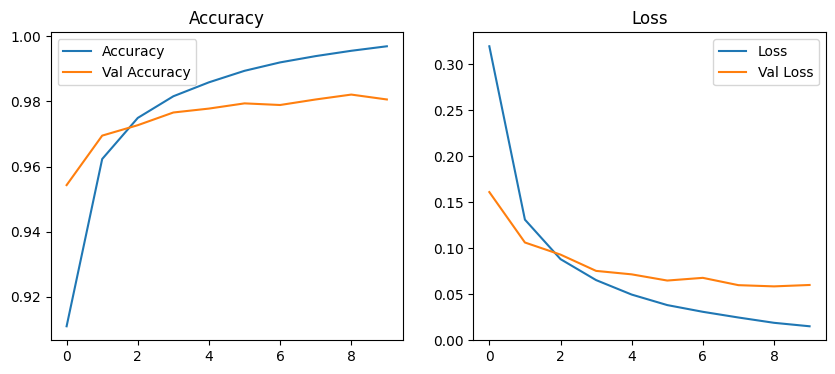

In [61]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(history.history['accuracy'], label='Accuracy' )
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy' )
ax[0].set_title('Accuracy')
ax[0].legend(loc='best')
ax[1].plot(history.history['loss'], label='Loss' )
ax[1].plot(history.history['val_loss'], label='Val Loss' )
ax[1].set_title('Loss')
ax[1].legend(loc='best')

In [62]:
mlflow.log_figure(fig,'training_history.png')

In [63]:
y_test_int = np.argmax(y_test,axis = 1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred,axis = 1)

target_names = [str(i) for i in range(10)]
print(classification_report(y_test_int, y_pred_int,target_names=target_names))
clf_rpt = classification_report(y_test_int, y_pred_int,target_names=target_names, output_dict = True)


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [64]:
conf = confusion_matrix(y_test_int, y_pred_int, labels=[i for i in range(10)])

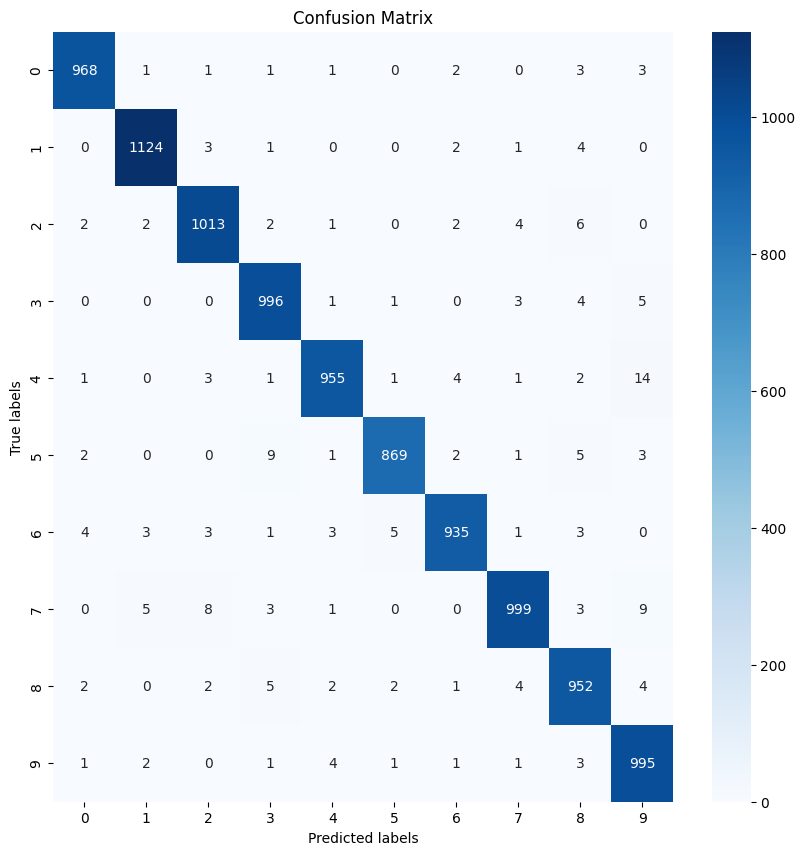

In [65]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(conf, annot=True, fmt='g', ax=ax, cmap = plt.cm.Blues);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);
mlflow.log_figure(fig,'confusion_matrix.png')

In [66]:
mlflow.end_run()

In [73]:
f1_score_filter = "metrics.accuracy > 0.60"
mlflow.search_runs(experiment_names=["Default"])

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.val_loss,metrics.loss,metrics.accuracy,metrics.val_accuracy,...,params.steps_per_epoch,params.batch_size,params.opt_name,params.use_multiprocessing,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.autologging
0,afb7f84c59644c3887095029f7136866,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 16:07:15.682000+00:00,2024-06-24 16:07:20.087000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,arindam.d.dey,LOCAL,rare-hog-767,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,None,None
1,d67db828d02341279eea9d90d199f3ea,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 16:06:33.937000+00:00,2024-06-24 16:07:14.756000+00:00,0.060050,0.015159,0.996933,0.9806,...,None,256,Adam,False,arindam.d.dey,LOCAL,whimsical-cow-906,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""d67db828d02341279eea9d90d199f3ea""...",tensorflow
2,652e7d3562f34cb2b3f8307bc92be785,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 16:03:15.161000+00:00,2024-06-24 16:04:16.986000+00:00,0.061716,0.015173,0.996983,0.9811,...,None,256,Adam,False,arindam.d.dey,LOCAL,kindly-pug-808,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""652e7d3562f34cb2b3f8307bc92be785""...",tensorflow
3,3a05eb7d918f4e39baaf5dfe13e6defd,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 15:35:42.980000+00:00,2024-06-24 15:35:47.142000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,arindam.d.dey,LOCAL,traveling-cat-341,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,None,None
4,dd67320e40834e579655eeafec165497,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 15:34:58.738000+00:00,2024-06-24 15:35:42.147000+00:00,0.062852,0.016755,0.996633,0.9801,...,None,256,Adam,False,arindam.d.dey,LOCAL,inquisitive-slug-30,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""dd67320e40834e579655eeafec165497""...",tensorflow
5,2f11d366335e4dfd84655853f73e844f,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 15:28:40.967000+00:00,2024-06-24 15:29:36.587000+00:00,0.067006,0.001573,0.999967,0.9829,...,None,256,Adam,False,arindam.d.dey,LOCAL,flawless-bass-815,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""2f11d366335e4dfd84655853f73e844f""...",tensorflow
6,556f16861e714ebbaef11030f56e87ba,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-24 15:19:27.759000+00:00,2024-06-24 15:20:27.011000+00:00,0.066211,0.001483,0.999983,0.9820,...,None,256,Adam,False,arindam.d.dey,LOCAL,righteous-jay-581,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""556f16861e714ebbaef11030f56e87ba""...",tensorflow
7,2dadfd4dda024b8884be67dcd258fd20,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-17 15:14:28.171000+00:00,2024-06-17 15:15:11.071000+00:00,0.072831,0.052187,0.984883,0.9779,...,None,256,Adam,False,arindam.d.dey,LOCAL,intrigued-robin-626,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""2dadfd4dda024b8884be67dcd258fd20""...",tensorflow
8,f38d7ad1cd90486e8adb52abc2993a1b,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-17 15:09:38.620000+00:00,2024-06-17 15:10:16.305000+00:00,0.071313,0.051350,0.985183,0.9795,...,None,256,Adam,False,arindam.d.dey,LOCAL,monumental-bird-572,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""f38d7ad1cd90486e8adb52abc2993a1b""...",tensorflow
9,47fdef7738f44fcb9810ce65566da9a0,0,FINISHED,mlflow-artifacts:/d75fe3aa82a54f86b434ca51d2f0...,2024-06-17 15:05:16.570000+00:00,2024-06-17 15:06:16.063000+00:00,0.063596,0.005214,0.999417,0.9807,...,None,256,Adam,False,arindam.d.dey,LOCAL,enchanting-ray-395,C:\Users\arind\anaconda3\envs\tf\lib\site-pack...,"[{""run_id"": ""47fdef7738f44fcb9810ce65566da9a0""...",tensorflow
